#  "Monty Hall" game analysis

#### This notebook is to examine the success rates of 3 different types of players
a - never changes his mind
b - always changes his mind
c- changes his mind 50% of times

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

In [2]:
def grill_car():
    return np.random.randint(1,4) ## returns the range of [1,4)

In [3]:
def door_first_choise():
    return np.random.randint(1,4)

In [4]:
def host_shows_goat_door(car_door, first_choise):
    return [index for index in (1,2,3) if index != car_door and index != first_choise][0] ## the remaining goat door

In [5]:
def swithching_decision(player_type, first_choise, goat_door):
    if player_type == 'a': ## sticks with his first choise
        return first_choise
    
    elif player_type == 'b': ## always switches
        return [index for index in (1,2,3) if index != first_choise and index != goat_door][0]
    
    else: ## 50% switch 50% not
        fifty_fifty = np.random.randint(0,2)
        if fifty_fifty == 0: ## switch
            return [index for index in (1,2,3) if index != first_choise and index != goat_door][0]
        else:
            return first_choise
        

In [6]:
def check_win(guess, car_door):
    return (guess == car_door)

In [7]:
def play(player_type):
    
    car_door = grill_car()
    
    first_choise = door_first_choise()
    
    second_choise = swithching_decision(player_type, first_choise, host_shows_goat_door(car_door, first_choise))
    
    return check_win(second_choise, car_door)

In [8]:
def plot_accumulated_array(values, player_type):
    plt.figure(figsize=(14,5))
    plt.plot(np.linspace(0,1000,1000), values)
    plt.xlabel('number of plays')
    plt.ylabel('success rate so far')
    plt.title(f'the accumulated probability of winning the "Monti-Hall" game, for player_type {player_type}')
    return

In [9]:
def play_1000_times_and_plot(player_type):
    
    ##playing 1000 times
    results = []
    for i in range(1000):
        results.append(play(player_type)) 
        
    ##accumulating the results
    accumulated_results = []
    for i in range(1000):
        accumulated_results.append((sum(results[:i+1]))/(i+1)) 
        
    ##plotting
    plot_accumulated_array(accumulated_results, player_type)
    return 1

In [10]:
def Question2_players_a_b_c():
    play_1000_times_and_plot('a')
    play_1000_times_and_plot('b')
    play_1000_times_and_plot('c')
    

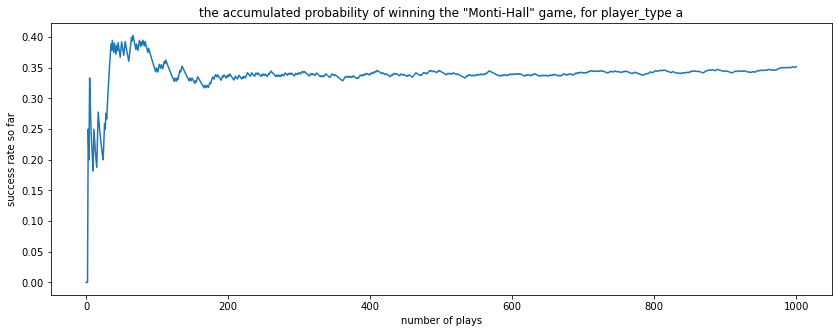

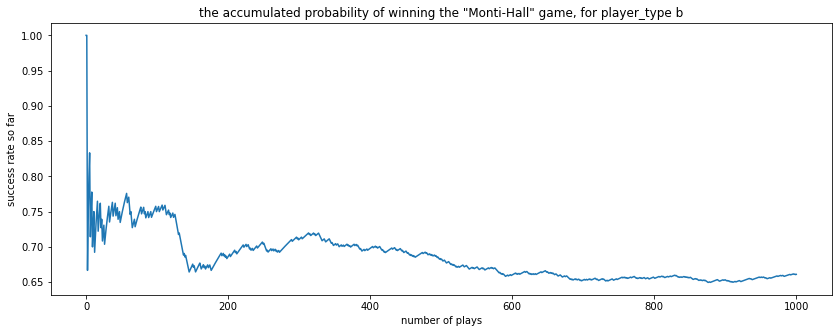

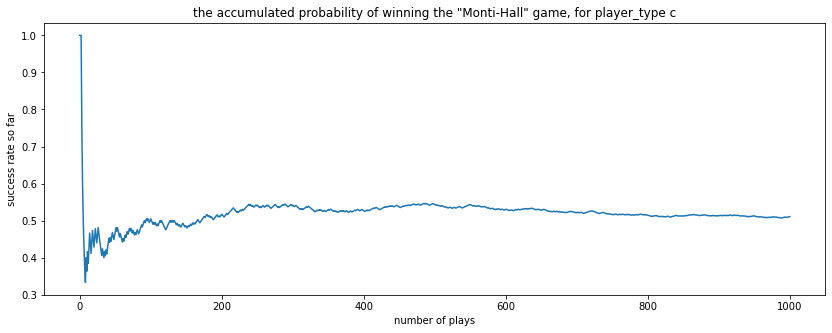

In [11]:
Question2_players_a_b_c()

#### explanation about the graphs
The player that had the highest success rate was player b (the one who always switch), It is predicted according to what we studied in class.
Player a had an expected rate of 0.3 since it's simple probability (1 out of 3, no manipulations)
Player c had combined success rate with a and b, the more times the rand number said 'change' the higher the success rate was.

This, of course, could have been predicted